# GOLD PRICE PREDICTION

## RANDOM FOREST

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [2]:
df = pd.read_csv("gld_price_data.csv")

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
df.shape

(2290, 6)

In [8]:
# find the coorelation 

data = df.drop(['Date'],axis = 1)
corelation = data.corr()

<Axes: >

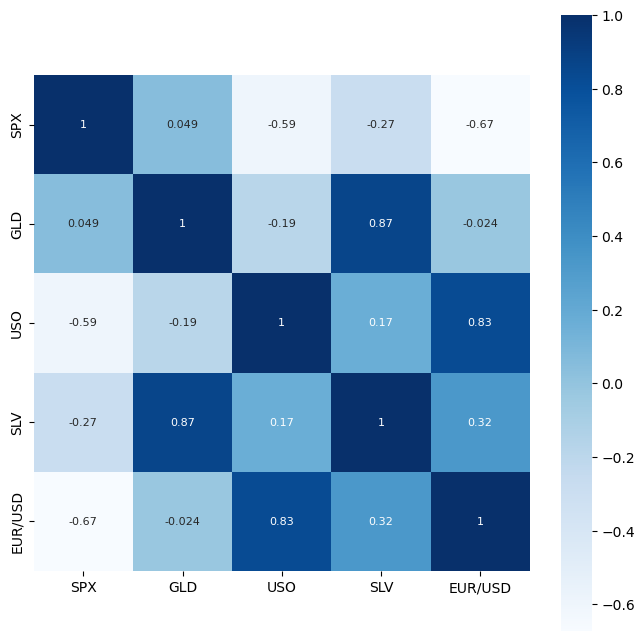

In [9]:
plt.figure(figsize = (8,8))
sns.heatmap(corelation , cbar = True , square = True , annot = True , annot_kws = {'size':8} , cmap = 'Blues')

In [10]:
# corelation values of gld
corelation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\SIDDHARTH LUMAR\AppData\Local\Temp\ipykernel_9944\4167204045.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'] , color ='green')


<Axes: xlabel='GLD', ylabel='Density'>

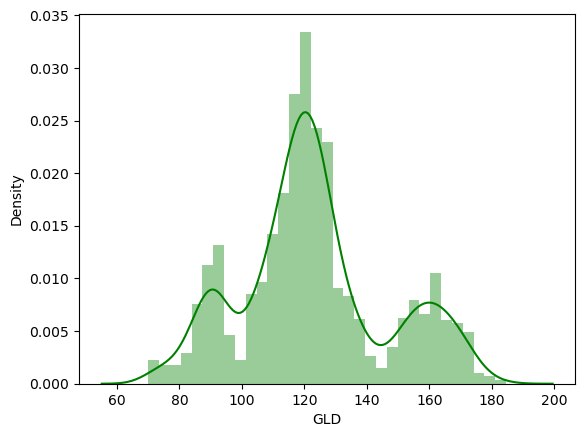

In [11]:
# check the distribution of GLD price
sns.distplot(df['GLD'] , color ='green')

In [12]:
x = df.drop(['Date' , 'GLD'],axis = 1)
y = df['GLD']

In [13]:
x.shape

(2290, 4)

In [14]:
y.shape

(2290,)

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 )

In [16]:
x_train.shape

(1832, 4)

In [17]:
x_test.shape

(458, 4)

In [18]:
y_train.shape

(1832,)

In [19]:
y_test.shape

(458,)

# model 

In [20]:
model = RandomForestRegressor(n_estimators = 100)

In [21]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
test_data_predict = model.predict(x_test)

In [23]:
test_data_predict

array([121.77349994, 135.13200137,  91.40170134, 119.97859901,
       112.14220122, 118.73859997, 146.04560023,  89.14899939,
        87.34379877, 120.92319858, 134.1581981 , 121.68469988,
        87.41319867,  89.25929995, 124.6612003 , 159.44259841,
       127.73260006, 150.84220291, 145.72399871,  86.80689806,
       117.9649004 , 121.6987002 ,  85.1126997 , 107.83560049,
       158.09570111, 113.50129968,  82.44709897, 107.83740018,
       128.04449648, 139.30110137, 123.41019864, 120.39519994,
       105.02160206, 132.65630172, 144.74980133, 127.27789846,
       162.40090073, 121.55409921, 124.89860064, 117.38819892,
       121.1924997 , 118.19829996,  90.54169846, 152.1812003 ,
       107.40719896, 132.06099982, 116.91990134, 145.94929615,
       127.1171013 , 119.41229957, 120.57620157, 156.02600105,
       124.56090099, 150.17529987, 149.36560435, 174.46479984,
       126.13279883, 108.94300116, 119.37000009, 109.02079932,
       118.93780266, 122.17170032, 115.83249795, 166.75

In [27]:
# r squared error
r2score = metrics.r2_score(y_test,test_data_predict)
r2score

0.9856647625379686

In [28]:
type(y_test)

pandas.core.series.Series

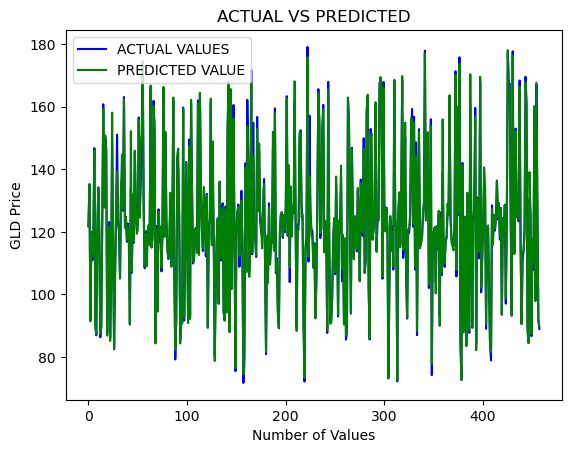

In [29]:
Y_test = list(y_test)

plt.plot(Y_test , color = 'blue' , label = 'ACTUAL VALUES')
plt.plot(test_data_predict , color = 'green' , label ='PREDICTED VALUE')
plt.title('ACTUAL VS PREDICTED')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [32]:
# Linear regression
Model_1 = LinearRegression()
Model_1.fit(x_train,y_train)
y_pred_1 = Model_1.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_1)
mse = mean_squared_error(y_test, y_pred_1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_1))
r2 = r2_score(y_test, y_pred_1)

print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("R2 :",r2)

MAE : 5.988617495733657
MSE : 74.05100382698298
RMSE : 8.605289293625344
R2 : 0.8595798326505796


In [33]:
# support vector regressor
Model_2 = SVR()
Model_2.fit(x_train,y_train)
y_pred_2 = Model_2.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_2)
mse = mean_squared_error(y_test, y_pred_2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))
r2 = r2_score(y_test, y_pred_2)

print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("R2 :",r2)

MAE : 15.922715503930501
MSE : 470.28175057653306
RMSE : 21.685980507612125
R2 : 0.10822218870080502


In [34]:
# decission Tree Regressor
Model_3 = DecisionTreeRegressor()
Model_3.fit(x_train,y_train)
y_pred_3 = Model_3.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_3)
mse = mean_squared_error(y_test, y_pred_3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_3))
r2 = r2_score(y_test, y_pred_3)

print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("R2 :",r2)

MAE : 1.8816512423580782
MSE : 20.562708310507613
RMSE : 4.53461225580618
R2 : 0.9610077001945155
